<a href="https://colab.research.google.com/github/flowonthegoliv/ENVS666_2022/blob/main/Fourier_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

In [5]:
#read in the data 
df = pd.read_csv('sensor_1 (3).csv',sep = ';')
pm2p5 = df['PM2.5']
time = pd.DatetimeIndex(df['Date & Time'])


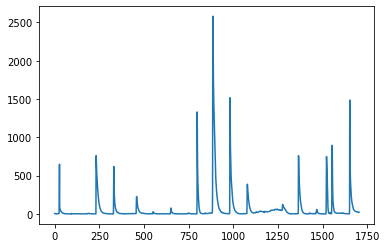

In [6]:
plt.plot(pm2p5)

In [8]:
#sticking in some correlations 
pm2p5f = pm2p5-np.nanmean(pm2p5)
corr = np.correlate(pm2p5f,pm2p5f,'full')

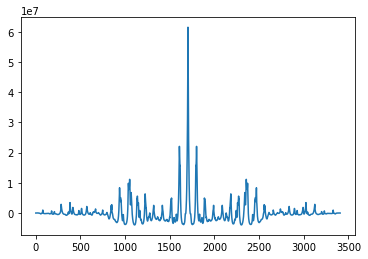

In [9]:
plt.plot(corr)

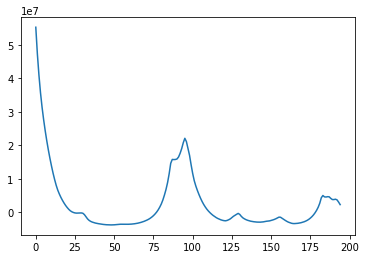

In [14]:
(len(corr)+1)/2

plt.plot(corr[1705:1900])

In [19]:
#we can see that cross zero (by eye) at ~25 

#check the time difference

(25*15)/60

#remeber we need to double the freq at the end so in our house we have an event every 12 hours 

96

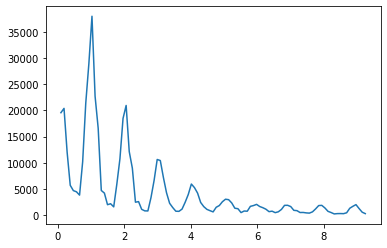

In [23]:
# let take a look the fourier 
from scipy import signal
x = pm2p5f
fs = 96
# taken at 15 minute intervals, there then 96 15 minute intevrals in the day.
fxx, pxx = signal.welch(x,fs,nperseg=1028)

plt.plot(fxx[1:100],pxx[1:100])

(array([ 64., 183., 122., 113., 103.,  71.,  72.,  47.,  49.,  26.,  21.,
         26.,  17.,  16.,  12.,  19.,  13.,  18.,  22.,  21.,  11.,   8.,
         12.,   8.,   7.,  12.,  12.,   4.,   4.,   5.,   8.,   9.,   4.,
          3.,   6.,   3.,   2.,   7.,   6.,   5.,   7.,  11.,   3.,   3.,
          5.,   5.,   5.,   4.,   1.,   1.,   6.,   4.,   9.,   7.,   7.,
          9.,   2.,   5.,   5.,   3.,   4.,   3.,  10.,   4.,   9.,   6.,
          5.,   6.,   7.,   2.,   4.,   3.,   4.,   4.,   3.,   1.,   1.,
          1.,   1.,   2.,   1.,   5.,   3.,   0.,   1.,   1.,   2.,   0.,
          2.,   1.,   2.,   1.,   4.,   4.,   6.,   4.,   6.,   9.,   3.,
          4.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
        11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
        16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5,
        22. , 22.5, 23

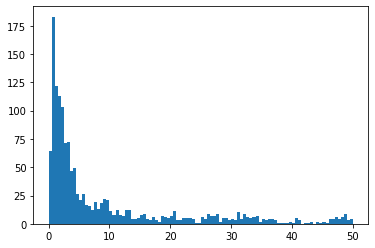

In [28]:
plt.hist(pm2p5,bins=100,range=[0,50])